In [47]:
import pandas as pd
from pathlib import Path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

PARENT_DIR = Path().resolve().parent
DATA_DIR = PARENT_DIR / 'deployment_script/data/'
print(DATA_DIR)

C:\Users\Nusatrip\Repo\news-scraper\deployment_script\data


In [2]:
df = pd.read_csv(DATA_DIR / 'data.csv')
df.head()

,keyword,platform,date,url,title,score
0,anies baswedan,cnn,2024-01-04 10:12:02,https://www.cnnindonesia.com/nasional/20240104...,Rafael Alun Divonis 14 Tahun Bui di Kasus Grat...,0.000000
1,anies baswedan,cnn,2024-01-08 13:46:00,https://www.cnnindonesia.com/nasional/20240108...,Pertimbangan Hakim: Kata 'Lord' di Kasus Luhut...,0.000000
2,anies baswedan,cnn,2024-01-08 13:48:20,https://www.cnnindonesia.com/nasional/20240108...,Pemeriksaan Gus Miftah soal Bagi-Bagi Duit Dig...,-0.100000
3,anies baswedan,cnn,2024-01-08 13:25:16,https://www.cnnindonesia.com/internasional/202...,Menlu Retno: RI Pemain Utama di Kawasan-Global...,0.013889
4,anies baswedan,cnn,2024-01-08 12:47:42,https://www.cnnindonesia.com/internasional/202...,Menlu Retno Tagih Komitmen AS Cs soal Tampung ...,-0.125000


In [52]:
df_anies = df[df['keyword']=='anies baswedan'].reset_index(drop=True)
df_prabowo = df[df['keyword']=='prabowo subianto'].reset_index(drop=True)
df_ganjar = df[df['keyword']=='ganjar pranowo'].reset_index(drop=True)

In [156]:
# Create stopword list
stopwords = {
    'ada','aku','akan','anda','apa','bukan','dan','dari','debat','di','ini','itu','jika','juga','kali','karena','ke','ketiga','saat',
    'saya','soal','tak','tidak','untuk','yang'
}

In [108]:
def wc(df, img_path, more_stopwords):
    img_path = PARENT_DIR / img_path
    text = " ".join([i for i in df.title])
    print ("There are {} words from news title with keyword {}.".format(len(text),df.loc[0,'keyword']))
    
    mask = np.array(Image.open(img_path))
    # Generate a word cloud image
    sw = stopwords | more_stopwords
    wordcloud_por = WordCloud(stopwords=sw, background_color='white', max_words=5000, mask=mask).generate(text)

    # create coloring from image
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[7,7])
    plt.imshow(wordcloud_por.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    plt.savefig(PARENT_DIR / f'save_img/{df.loc[0,"keyword"]}.jpg')
    plt.show()

There are 38013 words from news title with keyword anies baswedan.


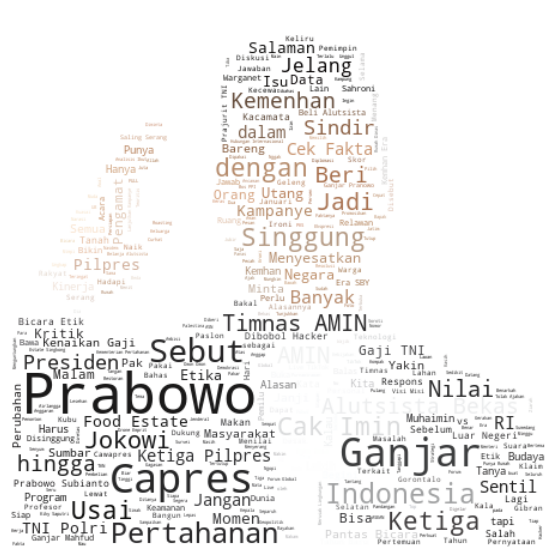

In [109]:
wc(df_anies, img_path='img/anies.jpg', more_stopwords={'anies','baswedan'})

There are 43107 words from news title with keyword prabowo subianto.


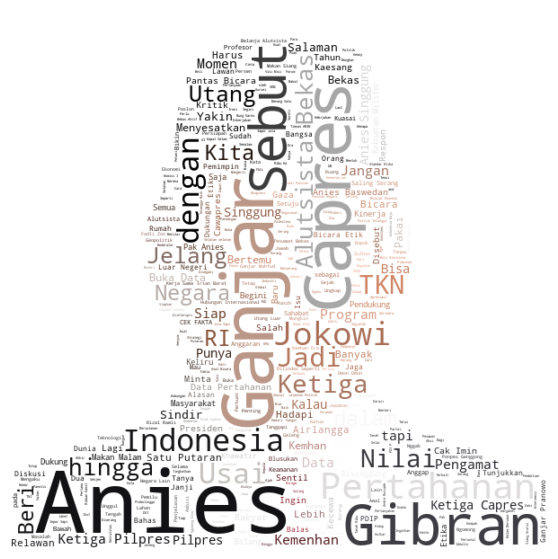

In [110]:
wc(df_prabowo, img_path='img/prabowo.jpg', more_stopwords={'prabowo','subianto'})

There are 43832 words from news title with keyword ganjar pranowo.


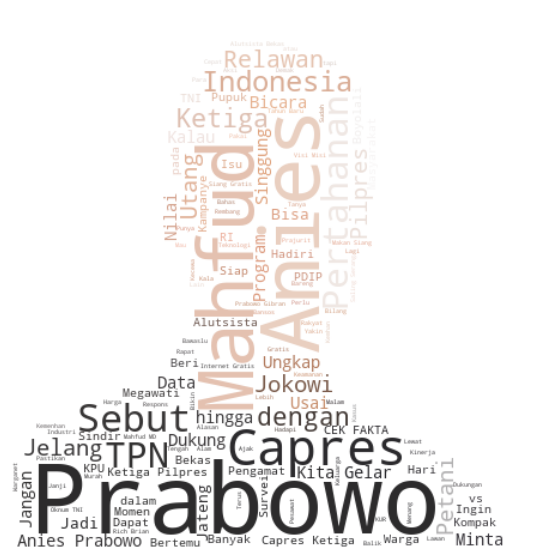

In [111]:
wc(df_ganjar, img_path='img/ganjar.jpg', more_stopwords={'ganjar','pranowo'})

In [112]:
from collections import Counter

In [157]:
def word_count(df, more_stopwords):
    texts = " ".join([title for title in df.title])
    sw = stopwords | more_stopwords
    words = [re.sub(r'[^\w\s]', '', w) for w in texts.split()]
    words = [w for w in words if w.lower() not in sw]
    word_counts = Counter(words)

    # Convert the word counts to a DataFrame
    word_counts_df = pd.DataFrame(list(word_counts.items()), columns=['Word', 'Count'])

    # Sort the DataFrame by count in descending order
    word_counts_df = word_counts_df.sort_values(by='Count', ascending=False).head(10)

    # Plot the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(word_counts_df['Word'], word_counts_df['Count'], color='g')
    total = word_counts_df.iloc[0,1]
    plt.text(x=-0.25, y=total*1.01, s=total, color='r')
    plt.xlabel('Word')
    plt.ylabel('Count')
    plt.title(f'Asosiasi kata pada berita dengan tag: {df.loc[0,"keyword"].title()}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.savefig(f'{df.loc[0,"keyword"]}.jpg')
    plt.show()

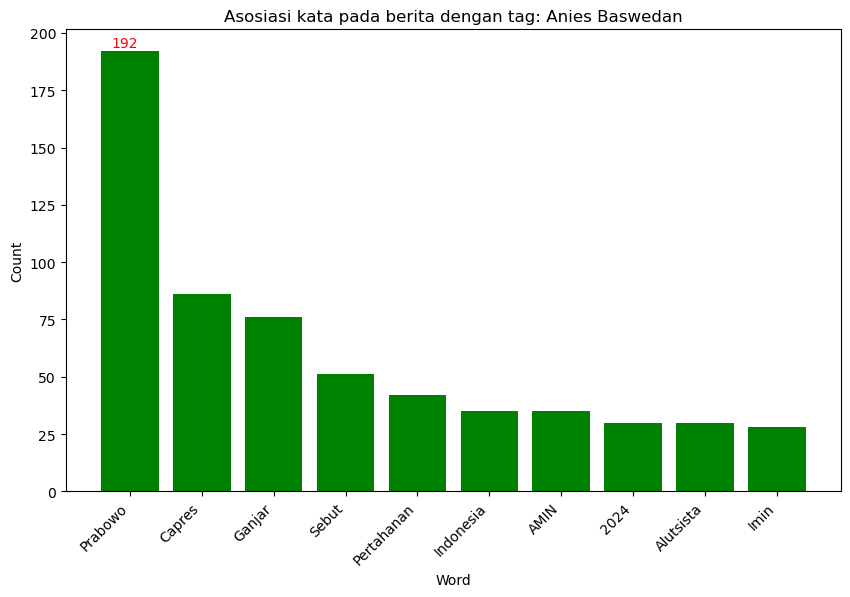

In [158]:
word_count(df_anies, more_stopwords={'anies','baswedan'})

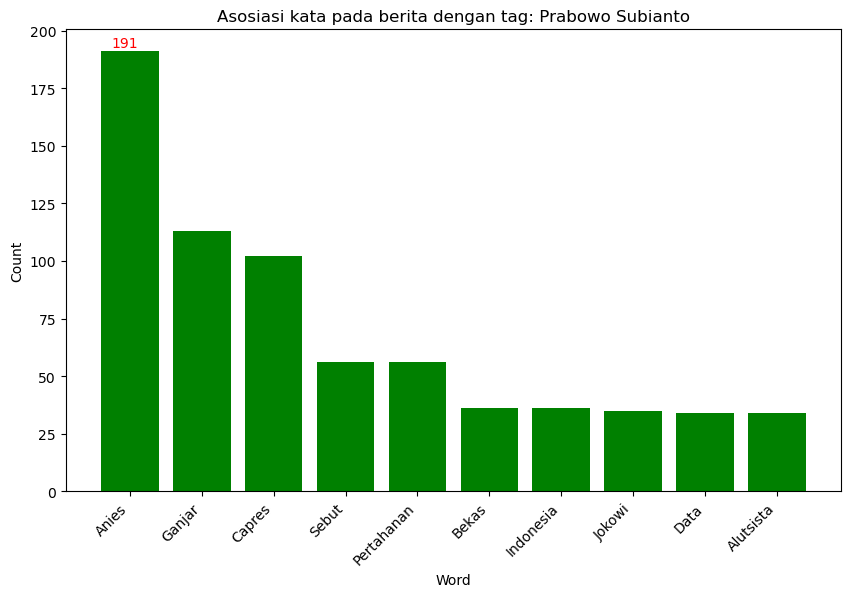

In [159]:
word_count(df_prabowo, more_stopwords={'prabowo','subianto','prabowogibran'})

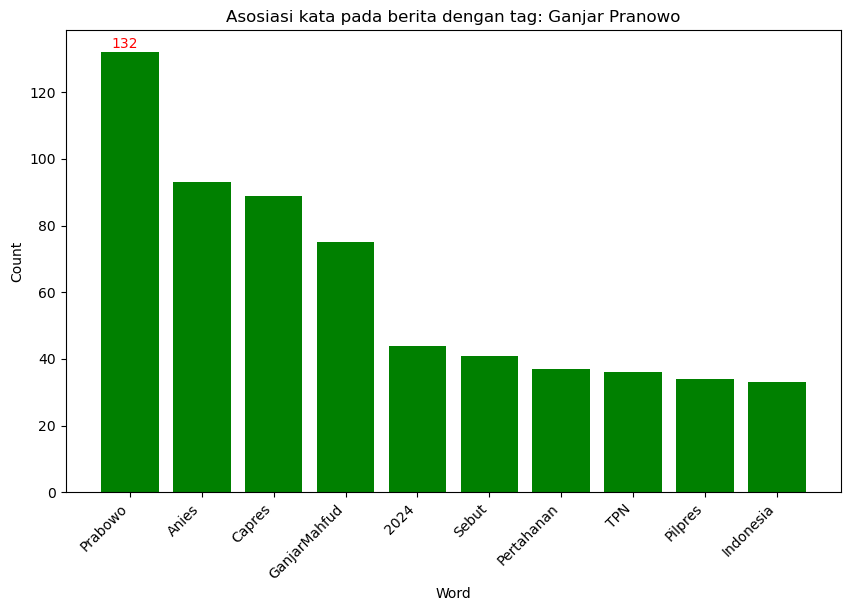

In [160]:
word_count(df_ganjar, more_stopwords={'ganjar','pranowo'})